In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [152]:
telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1. Demographics

In [153]:
'''working with only the customers who stayed with the brand'''
df_no = telco.loc[(telco['Churn']=='No')]


First group by these columns (primary customer attributes: Sex, Age, Partnered, Dependents).
Then sort by ascending number of customers by tenure

In [154]:
'''number of customers that have stayed'''
demographic.tenure.sum()

5174

In [155]:
demographic = df_no.groupby(by=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'MonthlyCharges'])['tenure'].size().reset_index()
demographic.sort_values(by='tenure', ascending=False, inplace=True)
demographic

,gender,SeniorCitizen,Partner,Dependents,Contract,MonthlyCharges,tenure
2165,Male,0,No,No,Month-to-month,20.05,10
1583,Female,0,Yes,Yes,Two year,19.70,10
2159,Male,0,No,No,Month-to-month,19.75,9
1591,Female,0,Yes,Yes,Two year,20.10,8
21,Female,0,No,No,Month-to-month,19.90,8
...,...,...,...,...,...,...,...
1542,Female,0,Yes,Yes,One year,99.25,1
1543,Female,0,Yes,Yes,One year,99.65,1
1544,Female,0,Yes,Yes,One year,99.70,1
1545,Female,0,Yes,Yes,One year,99.75,1


<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

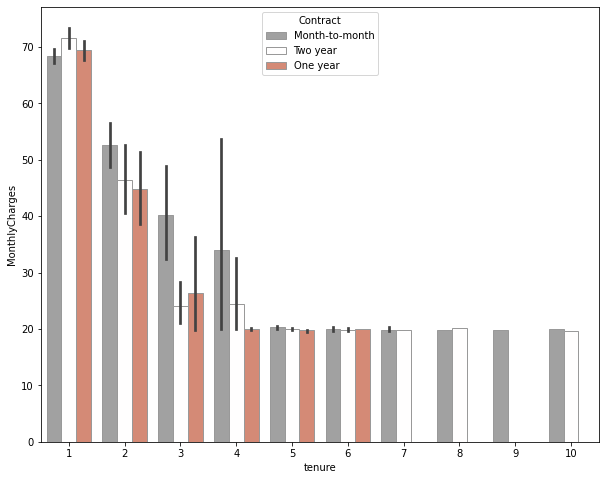

In [156]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=demographic, x="tenure", y="MonthlyCharges", hue="Contract", palette="RdGy_r", edgecolor=".6", ax=ax)

a.) The top 3 demographics that have proven to be the most popular with the telco brand in order are:
1. Young male & female unpartnered customers with no dependents
2. Young male & female customers with partners and dependents
3. Young male & female partnered customers with no dependents

b.) If the marketing team wanted to increase customer retention they should target their advertisement to the above three demographics.

# 2. Services 

In [157]:
'''to identify all the columns with added services'''
telco.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [158]:
'''working with customers who left the bando'''
df_churn = telco.loc[(telco['Churn']=='Yes')]
df_churn.shape

(1869, 21)

In [171]:
charges = telco.groupby(by=['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Churn', 'tenure', 'Contract'])['MonthlyCharges'].agg(['size', 'sum', 'mean']).reset_index()
charges.sort_values(by='mean', inplace=True, ascending=False)
charges

# check value count of each column for charged services to know the top 3

,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Churn,tenure,Contract,size,sum,mean
3503,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,67,One year,1,118.35,118.350000
3508,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,72,One year,1,117.80,117.800000
3500,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,48,Month-to-month,1,117.45,117.450000
3489,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,No,68,One year,1,117.20,117.200000
3479,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,No,61,One year,2,233.70,116.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No,55,One year,4,77.45,19.362500
3727,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,59,Two year,1,19.35,19.350000
3588,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No,27,Month-to-month,3,57.95,19.316667
3614,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No,36,Month-to-month,1,19.20,19.200000


In [160]:
df = charges.sort_values(by='size', ascending=False, inplace=False, na_position='last')
df.head()

,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Churn,tenure,Contract,size,sum,mean
1774,Yes,Fiber optic,No,No,No,No,No,Yes,1,Month-to-month,117,8519.05,72.812393
3511,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No,1,Month-to-month,101,2037.65,20.174752
3697,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No,72,Two year,65,1497.75,23.042308
3698,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,1,Month-to-month,58,1164.70,20.081034
3497,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,No,72,Two year,56,6398.65,114.261607


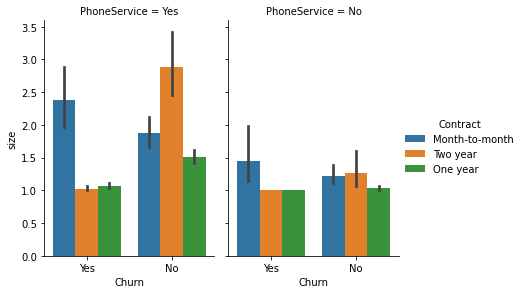

In [161]:
g = sns.catplot(x="Churn", y="size",
                hue="Contract", col="PhoneService",
                data=df, kind="bar",
                height=4, aspect=.7);

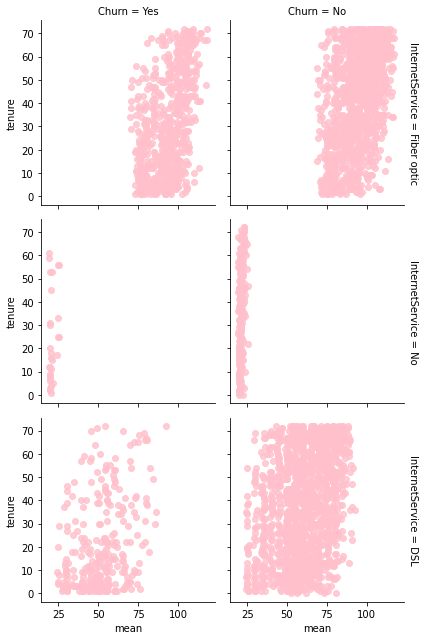

In [162]:
g = sns.FacetGrid(df, row="InternetService", col="Churn", margin_titles=True)
g.map(sns.regplot, "mean", "tenure", color='pink', fit_reg=False, x_jitter=.1)

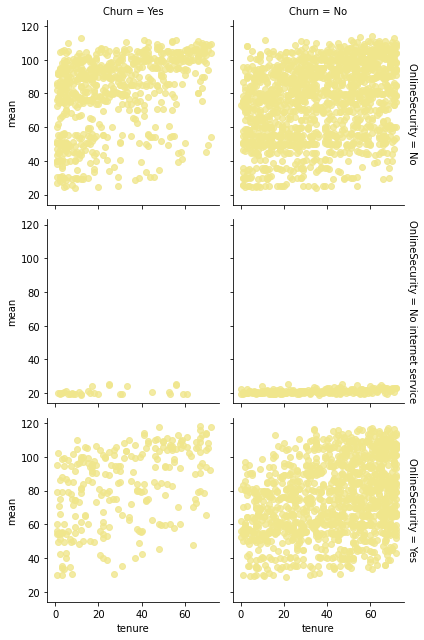

In [163]:
g = sns.FacetGrid(df, row="OnlineSecurity", col="Churn", margin_titles=True)
g.map(sns.regplot, "tenure", "mean", color="khaki", fit_reg=False, x_jitter=.1)


<AxesSubplot:xlabel='Churn', ylabel='tenure'>

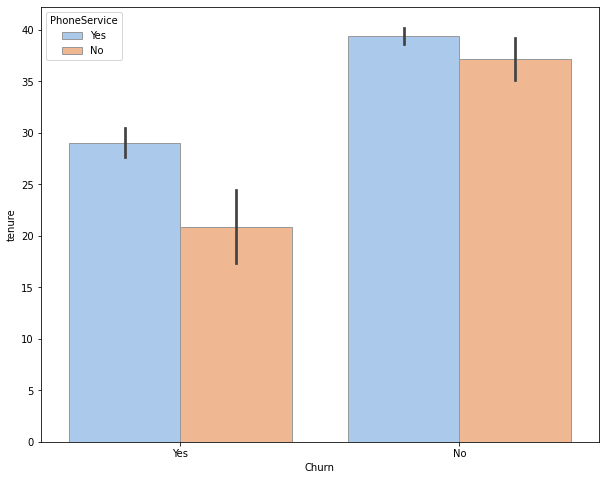

In [164]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=df, x="Churn", y="tenure", hue="PhoneService", palette="pastel", edgecolor=".6", ax=ax)

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

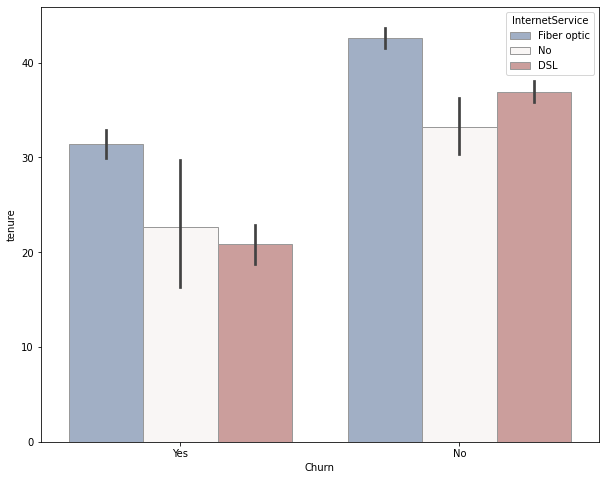

In [165]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=df, x="Churn", y="tenure", hue="InternetService", palette="vlag", edgecolor=".6", ax=ax)

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

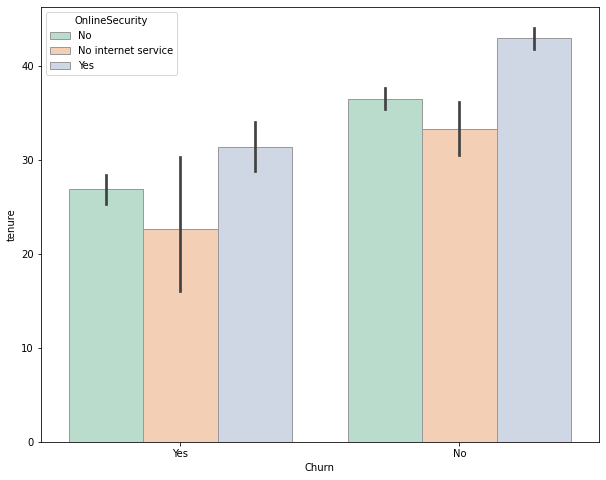

In [166]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=df, x="Churn", y="tenure", hue="OnlineSecurity", palette='Pastel2', edgecolor=".6", ax=ax)

a.) Which 3 services are contributing to a higher monthly charge and resulting to
customers churning?
Internet Service, Streaming TV, Tech Support

b.) If the telco was to offer Phone as a standalone service, which type of contract
would encourage customer retention? One Year Contract

# 3. Payment

<AxesSubplot:xlabel='Churn', ylabel='mean'>

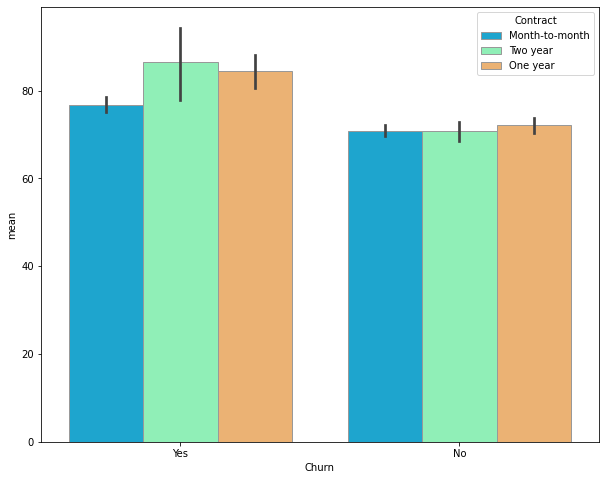

In [172]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=df, x="Churn", y="mean", hue="Contract", palette="rainbow", edgecolor=".6", ax=ax)

In [170]:
df.describe()

,tenure,size,sum,mean
count,3729.000000,3729.000000,3729.000000,3729.000000
mean,36.246715,1.888710,122.316063,73.103353
std,21.616246,3.999155,238.252030,25.145265
min,0.000000,1.000000,19.000000,19.000000
25%,17.000000,1.000000,61.250000,54.850000
50%,36.000000,1.000000,86.400000,77.150000
75%,55.000000,2.000000,107.000000,94.300000
max,72.000000,117.000000,8519.050000,118.350000


a.) If the company was to streamline all its services into 3 bouquet packages, what
monthly prices will be appropriate for the following packages to keep customers
from churning:

i. Basic - 19
ii. Plus - 73
iii. Premium - 117

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

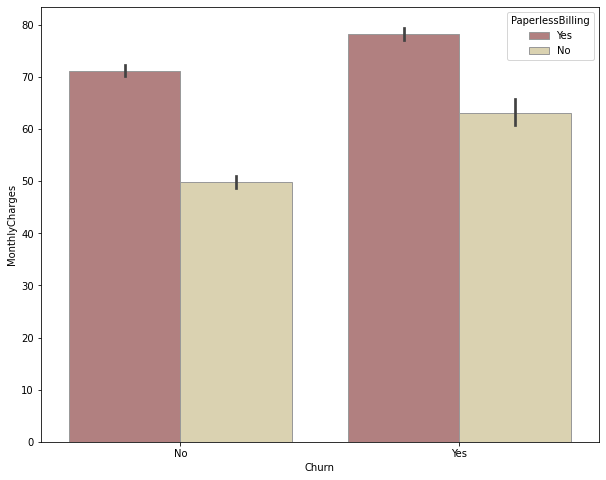

In [174]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=telco, x="Churn", y="MonthlyCharges", hue="PaperlessBilling", palette="pink", edgecolor=".6", ax=ax)

b. Should the company strictly go paperless for their monthly billings as a technique
of keeping their customers and why?

A lot of the customers who churned were already on paperless billing.
Its not a factor that seems to cause churn